# Pandas y Valores Faltandes




## Wine Reviews dataset

Vamos a trabajar con el siguiente dataset, que corresponde a reviews de vinos:

https://www.kaggle.com/zynicide/wine-reviews/downloads/wine-reviews.zip/4

Recomendamos leer su descripción y, cuando tengan tiempo, mirar algunos de los "kernels" que pueden encontrar en Kaggle.

1. Abrir el dataset e imprimir sus primeras instancias. Pueden descargarlo del link o usar el que está en el Trello.

In [16]:
%config IPCompleter.greedy=True
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
wine_reviews = pd.read_csv('winemag-data_first150k.csv', index_col=0)
wine_reviews

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Luego, descartar la columna `'Unnamed: 0'`.

In [18]:
shape = wine_reviews.shape
print("Numero de columnas: " , shape[1])
print("Numero de filas: ", shape[0])

Numero de columnas:  10
Numero de filas:  150930


3. ¿Cuántos valores faltantes hay en cada columna?

In [22]:
#filter = wine_reviews.notna()
#new_array = {}
#for i in wine_reviews.columns:
    #    numeros_faltantes = wine_reviews[wine_reviews[i].notna() == False].size
   # numeros_faltantes = len(wine_reviews[wine_reviews[i].isnull()])
  #  if numeros_faltantes > 0:
 #       new_array[i] = numeros_faltantes

#print(new_array)
# {'country': 50, 'designation': 457350, 'price': 136950, 'province': 50, 'region_1': 250600, 'region_2': 899770}
valores = wine_reviews.isnull().sum()

valores

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

4. ¿Cuál o cuáles son los vinos con más valores faltantes?

In [76]:

#b = wine_reviews.isna().sum(axis=1)

#datos_faltantes = wine_reviews[wine_reviews.isna().sum(axis=1)>=4]

print("Numero con datos faltantes en filas: ", len(datos_faltantes))
wine_reviews.isna().sum(axis=1).sort_values(ascending = False)[0:15]

#wine_reviews[wine_reviews.isna().sum(axis=1)>=4][0:15]


Numero con datos faltantes en filas:  282


1440      4
68568     4
132617    4
112865    4
38539     4
46012     4
100770    4
109308    4
111915    4
96412     4
12551     4
18036     4
38515     4
12560     4
108382    4
dtype: int64

5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuáles son el peor y el mejor vino? Imprimir en pantalla sus características y su descripción. ¿Hay un solo vino que sea el mejor o el peor?

In [36]:
wine_reviews.loc[wine_reviews['points'] == wine_reviews['points'].max()]
wine_reviews['points'].idmax()['description']

AttributeError: 'Series' object has no attribute 'idmax'

## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [32]:
wine_reviews_copia = wine_reviews.copy()
wine_reviews_copia.shape

(150930, 10)

In [35]:
wine_reviews_copia.dropna(inplace=True)
wine_reviews_copia.shape


(39241, 10)

2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [43]:
# Copiar el dataframe!
wine_reviews_copia = wine_reviews.copy()
wine_reviews_copia.dropna(axis=1, inplace=True)

print(wine_reviews_copia.columns)


Index(['description', 'points', 'variety', 'winery'], dtype='object')


In [319]:
wine_reviews_copia = wine_reviews_copia.dropna()
wine_reviews_copia.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [58]:
# Copiar el dataframe!
wine_reviews_copia = wine_reviews.copy()
wine_reviews_copia.shape

(150930, 10)

In [61]:
wine_reviews_copia.dropna(thresh=3)
wine_reviews_copia.shape
#print("Quedaron : ", wine_reviews_copia.shape[0], " instancias")

(39241, 10)

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [64]:
# Copiar el dataframe!
wine_reviews_copia = wine_reviews.copy()

In [65]:

porciento = wine_reviews_copia.isnull().sum() * 100 / len(wine_reviews_copia)
data = pd.DataFrame({'nombre_columna': wine_reviews_copia.columns, 'prociento': porciento})
data[data['prociento'] < 50]

,nombre_columna,prociento
country,country,0.003313
description,description,0.000000
designation,designation,30.302127
points,points,0.000000
price,price,9.073743
province,province,0.003313
region_1,region_1,16.603724
variety,variety,0.000000
winery,winery,0.000000


**Moraleja**: el orden importa. Primero, podemos descartar aquellas columnas con muchos valores faltantes y después descartar aquellas instancias con valores faltantes.

**Para pensar:** ¿de qué tipo son las variables del dataset?¿Es lo mismo un valor faltante en `price` que en `variety`?

**Ejercicio**

Hasta ahora, estamos descartando columnas y/o instancias sin prestar mucha atención qué representa cada columna. Elegir alguno de los siguientes objetivos y hacer un manejo de valores faltantes que consideren apropiado para ese objetivo:

* Predecir el precio de un vino. 
* Predecir la variedad de un vino.

Prestar atención a si no hay información redundante en las columnas.


In [338]:
wine_reviews_copia = wine_reviews.copy()

## Imputación de Valores Faltantes

La columna `price` tiene alrededor de 9 mil valores faltantes, pero no queremos descartarla ni descartar instancias por el simple hecho de que no sepamos su precio. Esto se debe a que el precio tiene mucha información y, eventualmente, puede ser la columna que querramos predecir. Además, no son tantos valores faltantes si consideramos la cantidad de instancias que tiene el dataset. Entonces:


1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [346]:
wine_reviews_copia = wine_reviews.copy()
#mode = wine_reviews_copia.price.mode
#mean = wine_reviews_copia.price.mean
#std = wine_reviews_copia.price.std
print(wine_reviews_copia.shape)
wine_reviews_copia.price.dropna().describe()


(150930, 10)


count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

2. Imputar los valores faltantes en la columna `price` usando su valor medio.

In [437]:
wine_reviews_copia = wine_reviews.copy()
media = wine_reviews_copia.price.mean()
wine_reviews_copia = wine_reviews_copia.price.fillna(media)
wine_reviews_copia.describe()
wine_reviews_copia

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [38]:
wine_reviews_copia.price.describe()


count    39241.000000
mean        37.546316
std         26.716547
min          4.000000
25%         22.000000
50%         32.000000
75%         45.000000
max       2013.000000
Name: price, dtype: float64

4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. La próxima clase ya nos meteremos de lleno en visualización. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

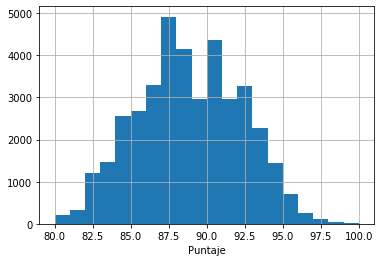

In [39]:
plt.hist(wine_reviews_copia.points, bins= 20)
plt.xlabel('Puntaje')
plt.grid()
plt.show()

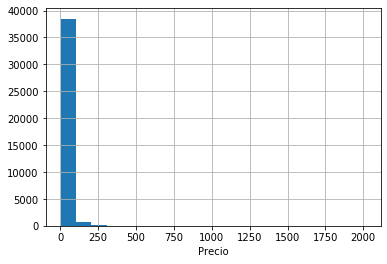

In [40]:
plt.hist(wine_reviews_copia.price, bins= 20)
plt.xlabel('Precio')
plt.grid()
plt.show()

In [82]:
import numpy as np
probabilidades = np.array([1,1,1,1,1,1])
probabilidades = probabilidades / probabilidades.sum()
print("Probas.: ", probabilidades)
print("Suma: ", probabilidades.sum().round())

# Mismas proba. - 2:
probabilidades = np.array([5,5,5,5,5,5])
probabilidades = probabilidades / probabilidades.sum()
print("Probas.: ", probabilidades)
print("Suma: ", probabilidades.sum().round())

# Los impares tienen 5 veces mas probabilidad de salir:
probabilidades = np.array([5,1,5,1,5,1])
probabilidades = probabilidades / probabilidades.sum()
print("Probas.: ", probabilidades)
print("Suma: ", probabilidades.sum())


Probas.:  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Suma:  1.0
Probas.:  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Suma:  1.0
Probas.:  [0.27777778 0.05555556 0.27777778 0.05555556 0.27777778 0.05555556]
Suma:  1.0


Respecto al segundo gráfico, ¿les gusta cómo queda?¿Qué es una escala logarítmica?

## Extra: Tripulación del Titanic

Si llegaste hasta acá y todavía tenés tiempo y ganas, te proponemos que explores el dataset de Supervivientes del Titanic. Queremos saber si los sobrevivientes del RMS Titanic murieron *al azar* o si los sobrevivientes tenían alguna característica distinta de las víctimas de la tragedia. Tenemos disponibles algunos datos sobre pasajeros/as del Titanic, que pueden descargar [acá](https://www.kaggle.com/c/titanic/) (solo el archivo `train.csv`) o descargar del Trello. La propuesta es analizarlos para intentar encontrar algunas características que separen a los/as pasajeros/as que sobrevivieron de los/as que no.

### Análisis Exploratorio de Datos

1. Cargar los datos desde el archivo csv.
1. Investigar qué forma tienen los datos utilizando las funciones exploratorias que aprendimos. ¿Qué información tenemos en los datos?¿Qué representa cada columna?¿Cuántos pasajeros/as están incluidos/as en este Dataset?
1. ¿Faltan datos? ¿Se te ocurre por qué? ¿Qué harías con ellos?
1. ¿Te parece que todas las columnas son informativas o borrarías alguna?

**Para pensar**: ¿te parece que la supervivencia (o no) fue un proceso completamente *al azar* o existe algún mecanismo generador de estos datos?¿Qué nos enseñó la famosa película de David Cameron?